<a href="https://colab.research.google.com/github/kundanpanday/PRODIGY_ML_03/blob/main/support_vector_machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attempting to load images from: path/to/your/kaggle/cats_vs_dogs_dataset/train
Resizing images to: (64, 64)
Processing up to 500 samples per class for demonstration.

Simulating image data loading because the specified DATA_DIR is invalid or empty.
Please ensure you have the Kaggle 'train' dataset unzipped at the specified path.
Generating dummy image data for demonstration purposes...

Shape of feature matrix (X_data): (1000, 4096)
Shape of labels array (y_labels): (1000,)

Splitting data into training and testing sets (80% train, 20% test)...
X_train shape: (800, 4096), y_train shape: (800,)
X_test shape: (200, 4096), y_test shape: (200,)

Scaling features using StandardScaler...
Features scaled.

Training SVM classifier (this may take a while for larger datasets)...
SVM training complete.

Making predictions on the test set...

Evaluating the model performance:
Accuracy: 0.4750

Classification Report:
              precision    recall  f1-score   support

         Cat       0.47    

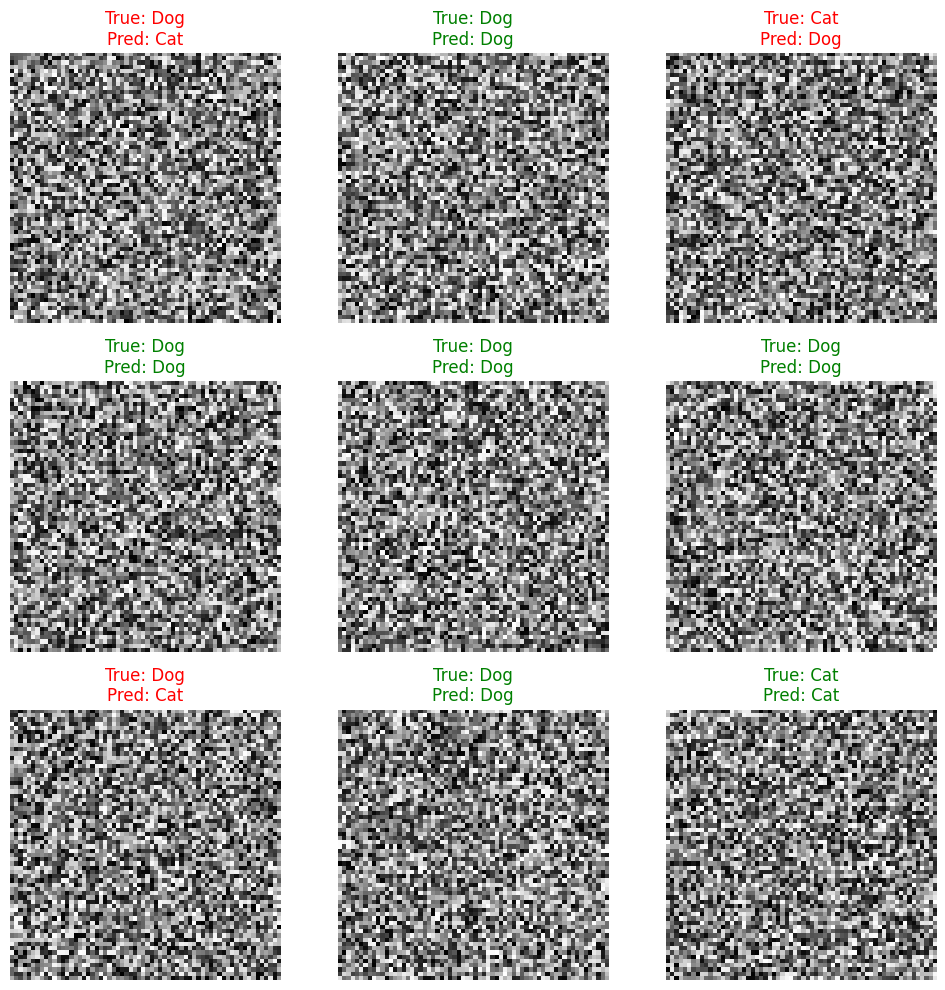

In [1]:
import numpy as np
import os
import cv2 # OpenCV for image processing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

# --- 1. Define Dataset Path and Image Parameters ---
# IMPORTANT: Replace 'path/to/your/kaggle/cats_vs_dogs_dataset' with the actual path
# to your unzipped Kaggle dataset (e.g., 'train' folder containing 'cat' and 'dog' subfolders).
# For demonstration, we'll simulate data loading.
DATA_DIR = 'path/to/your/kaggle/cats_vs_dogs_dataset/train' # Example path
IMAGE_SIZE = (64, 64) # Resize images to a common size for consistent feature vectors
NUM_SAMPLES_PER_CLASS = 500 # For demonstration, we'll limit the number of images to process
                            # to avoid very long execution times with a full dataset.
                            # Adjust this as needed for your system.

print(f"Attempting to load images from: {DATA_DIR}")
print(f"Resizing images to: {IMAGE_SIZE}")
print(f"Processing up to {NUM_SAMPLES_PER_CLASS} samples per class for demonstration.")

# --- 2. Load and Preprocess Image Data ---
# This function simulates loading images. In a real scenario, you would
# iterate through your dataset directory, read images, resize them, and
# flatten them into feature vectors.
def load_and_preprocess_images(data_directory, image_size, num_samples):
    """
    Loads images from specified directory, resizes them, flattens them,
    and assigns labels.

    Args:
        data_directory (str): Path to the dataset's 'train' directory.
        image_size (tuple): Target size for resizing images (width, height).
        num_samples (int): Number of samples to load per class.

    Returns:
        tuple: (list of flattened image data, list of labels)
    """
    images = []
    labels = []
    classes = ['cat', 'dog'] # Assuming subfolders named 'cat' and 'dog'

    for class_name in classes:
        class_path = os.path.join(data_directory, class_name)
        if not os.path.exists(class_path):
            print(f"Warning: Directory not found: {class_path}. Skipping this class.")
            continue

        print(f"Loading {class_name} images from {class_path}...")
        image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(image_files) # Shuffle to get a random subset
        image_files = image_files[:num_samples] # Limit samples for demonstration

        for i, img_file in enumerate(image_files):
            img_path = os.path.join(class_path, img_file)
            try:
                # Read image in grayscale to reduce dimensionality, or leave as color (BGR)
                # For simplicity, we'll convert to grayscale and flatten.
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Could not read image: {img_path}")
                    continue

                # Resize image to a fixed size
                img_resized = cv2.resize(img, image_size)

                # Flatten the image into a 1D feature vector
                # If using color images (BGR), flatten img_resized.flatten() would be 3 * width * height
                img_flattened = img_resized.flatten()
                images.append(img_flattened)
                labels.append(0 if class_name == 'cat' else 1) # 0 for cat, 1 for dog

            except Exception as e:
                print(f"Error processing {img_path}: {e}")
            if (i + 1) % 100 == 0:
                print(f"  Processed {i + 1}/{len(image_files)} {class_name} images.")

    print(f"Finished loading images. Total images loaded: {len(images)}")
    return np.array(images), np.array(labels)

# --- Simulate Data Loading if DATA_DIR does not exist or is empty ---
# In a real scenario, you would call load_and_preprocess_images(DATA_DIR, IMAGE_SIZE, NUM_SAMPLES_PER_CLASS)
# For this demonstration, we'll create dummy data if the path isn't valid.
if not os.path.exists(DATA_DIR) or not any(os.listdir(DATA_DIR)):
    print("\nSimulating image data loading because the specified DATA_DIR is invalid or empty.")
    print("Please ensure you have the Kaggle 'train' dataset unzipped at the specified path.")
    print("Generating dummy image data for demonstration purposes...")
    num_dummy_samples = NUM_SAMPLES_PER_CLASS * 2 # Total dummy samples
    dummy_image_features = IMAGE_SIZE[0] * IMAGE_SIZE[1] # Features for grayscale image
    X_data = np.random.rand(num_dummy_samples, dummy_image_features) * 255 # Pixel values 0-255
    y_labels = np.array([0] * NUM_SAMPLES_PER_CLASS + [1] * NUM_SAMPLES_PER_CLASS)
    # Shuffle dummy data to mix classes
    indices = np.arange(num_dummy_samples)
    np.random.shuffle(indices)
    X_data = X_data[indices]
    y_labels = y_labels[indices]
else:
    X_data, y_labels = load_and_preprocess_images(DATA_DIR, IMAGE_SIZE, NUM_SAMPLES_PER_CLASS)

if len(X_data) == 0:
    print("No images were loaded or simulated. Exiting.")
    exit() # Exit if no data is available

print(f"\nShape of feature matrix (X_data): {X_data.shape}")
print(f"Shape of labels array (y_labels): {y_labels.shape}")

# --- 3. Split Data into Training and Testing Sets ---
# It's crucial to split your data to evaluate the model's performance on unseen data.
print("\nSplitting data into training and testing sets (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# --- 4. Feature Scaling ---
# Scaling features is important for SVMs, as they are sensitive to the scale
# of the data. StandardScaler transforms data to have zero mean and unit variance.
print("\nScaling features using StandardScaler...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled.")

# --- 5. Train the Support Vector Machine (SVM) Classifier ---
# We'll use a Radial Basis Function (RBF) kernel, which is common for image classification.
# C: Regularization parameter. The strength of the regularization is inversely proportional to C.
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
print("\nTraining SVM classifier (this may take a while for larger datasets)...")
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

print("SVM training complete.")

# --- 6. Make Predictions ---
print("\nMaking predictions on the test set...")
y_pred = svm_classifier.predict(X_test_scaled)

# --- 7. Evaluate the Model ---
print("\nEvaluating the model performance:")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
# Target names for better readability in the report
target_names = ['Cat', 'Dog']
print(classification_report(y_test, y_pred, target_names=target_names))

print("\nSVM image classification process finished.")
print("Remember to set the 'DATA_DIR' variable to your actual dataset path for real usage.")

# --- Optional: Visualize some predictions ---
# This part will only work correctly if actual images are loaded and displayed.
# For dummy data, it will show random pixel patterns.
if 'X_data' in locals() and len(X_data) > 0 and 'cv2' in globals():
    print("\nDisplaying a few sample predictions (if images were loaded):")
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(X_test))): # Display up to 9 images
        idx = random.randint(0, len(X_test) - 1)
        # Reshape the flattened image back to its original dimensions
        img_display = X_test[idx].reshape(IMAGE_SIZE)
        true_label = 'Cat' if y_test[idx] == 0 else 'Dog'
        predicted_label = 'Cat' if y_pred[idx] == 0 else 'Dog'
        color = 'green' if true_label == predicted_label else 'red'

        plt.subplot(3, 3, i + 1)
        plt.imshow(img_display, cmap='gray') # Use 'gray' colormap for grayscale images
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
